### Diagnostic Analysis of Stock Volatility for Comparative Equity Selection

Project Goal

The primary goal of this project was to perform a Diagnostic Analysis on the daily performance of two selected stocks. This was done to understand, measure, and visually compare their key risk metric—specifically Annual Volatility—to inform potential equity selection decisions.

What I Did ?

Took the daily price movements for two stocks and calculated their Annual Volatility (risk score).

Why I Did It ?

To Understand Risk: The goal was to measure the "wildness" or instability of each stock's returns over a year.

To Help Decide: By looking at the final chart (which shows the risk score for each stock), a person can easily choose the stock that fits their risk preference (high-risk/high-reward or low-risk/stable).

In [ ]:
##What are we doing? :- We are downloading the daily historical stock prices for two companies
##Why are we doing this? :- We need the raw daily closing prices to perform our Diagnostic Analysis pip install nsepython

from nsepython import *
import pandas as pd

symbol = "eternal"
series = "EQ"
start_date = "04-12-2024"
end_date ="08-12-2025"
df = pd.DataFrame (equity_history(symbol,series,start_date,end_date))

symbol2 = "sbin"
series2 = "EQ"
start_date2 = "04-12-2024"
end_date2 ="08-12-2025"
df2 = pd.DataFrame (equity_history(symbol2,series2,start_date2,end_date2))

In [36]:
# The company name was changed from Eternal to zomato hence handling that before any calculation 
df['CH_SYMBOL'] = df['CH_SYMBOL'].replace('ZOMATO', 'ETERNAL')

# Looking at unique columns to make sure the changes are correct
df['CH_SYMBOL'].unique()

array(['ETERNAL'], dtype=object)

In [59]:
# Looking at first five rows to understand what data we have in the data frame
df.head()

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TIMESTAMP,TIMESTAMP,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,...,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_ISIN,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,symChange
0,692d810a8d5fb9cbd2d25e7b,ETERNAL,EQ,N,2025-12-01,2025-11-30T18:30:00.000Z,305.45,300.25,302.3,301.50,...,194.8,184663,INE758T01015,2025-12-01T11:50:34.770Z,2025-12-01T11:50:34.770Z,0,None,302.07,01-Dec-2025,NaN
1,692ed2894cafdcdc1ee9ecd1,ETERNAL,EQ,N,2025-12-02,2025-12-01T18:30:00.000Z,301.80,297.00,300.6,300.55,...,194.8,152979,INE758T01015,2025-12-02T11:50:33.838Z,2025-12-02T11:50:33.838Z,0,None,299.56,02-Dec-2025,NaN
2,693024094600e94d521b64c0,ETERNAL,EQ,N,2025-12-03,2025-12-02T18:30:00.000Z,302.95,296.00,300.6,297.75,...,194.8,125499,INE758T01015,2025-12-03T11:50:34.002Z,2025-12-03T11:50:34.002Z,0,None,298.78,03-Dec-2025,NaN
3,6931758ae3c786d1be586b36,ETERNAL,EQ,N,2025-12-04,2025-12-03T18:30:00.000Z,298.75,292.55,297.6,295.75,...,194.8,183511,INE758T01015,2025-12-04T11:50:34.398Z,2025-12-04T11:50:34.398Z,0,None,295.12,04-Dec-2025,NaN
4,6932c70adeeda3297c2d04c1,ETERNAL,EQ,N,2025-12-05,2025-12-04T18:30:00.000Z,299.70,291.15,295.0,292.40,...,194.8,130523,INE758T01015,2025-12-05T11:50:34.112Z,2025-12-05T11:50:34.112Z,0,None,294.72,05-Dec-2025,NaN


In [37]:
# Looking at first five rows to understand what data we have in the data frame
df2.head()

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TIMESTAMP,TIMESTAMP,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,...,CH_52WEEK_HIGH_PRICE,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_ISIN,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP
0,692d810b8d5fb9cbd2d265ec,SBIN,EQ,N,2025-12-01,2025-11-30T18:30:00.000Z,991.20,969.85,985.45,973.10,...,999.0,680.0,237856,INE062A01020,2025-12-01T11:50:35.555Z,2025-12-01T11:50:35.555Z,0,None,979.16,01-Dec-2025
1,692ed28a4cafdcdc1ee9f46f,SBIN,EQ,N,2025-12-02,2025-12-01T18:30:00.000Z,980.45,964.90,976.00,967.30,...,999.0,680.0,177697,INE062A01020,2025-12-02T11:50:34.640Z,2025-12-02T11:50:34.640Z,0,None,973.23,02-Dec-2025
2,6930240a4600e94d521b6c06,SBIN,EQ,N,2025-12-03,2025-12-02T18:30:00.000Z,972.55,947.55,970.45,951.05,...,999.0,680.0,233255,INE062A01020,2025-12-03T11:50:34.772Z,2025-12-03T11:50:34.772Z,0,None,952.61,03-Dec-2025
3,6931758be3c786d1be5872c0,SBIN,EQ,N,2025-12-04,2025-12-03T18:30:00.000Z,952.55,944.45,951.05,948.10,...,999.0,680.0,272677,INE062A01020,2025-12-04T11:50:35.201Z,2025-12-04T11:50:35.201Z,0,None,947.46,04-Dec-2025
4,6932c70adeeda3297c2d0c03,SBIN,EQ,N,2025-12-05,2025-12-04T18:30:00.000Z,973.30,946.70,948.85,971.50,...,999.0,680.0,190193,INE062A01020,2025-12-05T11:50:34.932Z,2025-12-05T11:50:34.932Z,0,None,961.57,05-Dec-2025


In [38]:
# Checking if there are any null values in the columns
df.isnull().sum()

_id                        0
CH_SYMBOL                  0
CH_SERIES                  0
CH_MARKET_TYPE             0
CH_TIMESTAMP               0
TIMESTAMP                  0
CH_TRADE_HIGH_PRICE        0
CH_TRADE_LOW_PRICE         0
CH_OPENING_PRICE           0
CH_CLOSING_PRICE           0
CH_LAST_TRADED_PRICE       0
CH_PREVIOUS_CLS_PRICE      0
CH_TOT_TRADED_QTY          0
CH_TOT_TRADED_VAL          0
CH_52WEEK_HIGH_PRICE       0
CH_52WEEK_LOW_PRICE        0
CH_TOTAL_TRADES            0
CH_ISIN                    0
createdAt                  0
updatedAt                  0
__v                        0
SLBMH_TOT_VAL            258
VWAP                       0
mTIMESTAMP                 0
symChange                257
dtype: int64

In [39]:
# Checking if there are any null values in the columns
df2.isnull().sum()

_id                        0
CH_SYMBOL                  0
CH_SERIES                  0
CH_MARKET_TYPE             0
CH_TIMESTAMP               0
TIMESTAMP                  0
CH_TRADE_HIGH_PRICE        0
CH_TRADE_LOW_PRICE         0
CH_OPENING_PRICE           0
CH_CLOSING_PRICE           0
CH_LAST_TRADED_PRICE       0
CH_PREVIOUS_CLS_PRICE      0
CH_TOT_TRADED_QTY          0
CH_TOT_TRADED_VAL          0
CH_52WEEK_HIGH_PRICE       0
CH_52WEEK_LOW_PRICE        0
CH_TOTAL_TRADES            0
CH_ISIN                    0
createdAt                  0
updatedAt                  0
__v                        0
SLBMH_TOT_VAL            258
VWAP                       0
mTIMESTAMP                 0
dtype: int64

In [40]:
## Combined both the data frames to have one single dataframe for analysis and calculations
combined_df = pd.concat([df, df2], ignore_index=True)
combined_df.head()

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TIMESTAMP,TIMESTAMP,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,...,CH_52WEEK_LOW_PRICE,CH_TOTAL_TRADES,CH_ISIN,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,symChange
0,692d810a8d5fb9cbd2d25e7b,ETERNAL,EQ,N,2025-12-01,2025-11-30T18:30:00.000Z,305.45,300.25,302.3,301.50,...,194.8,184663,INE758T01015,2025-12-01T11:50:34.770Z,2025-12-01T11:50:34.770Z,0,None,302.07,01-Dec-2025,NaN
1,692ed2894cafdcdc1ee9ecd1,ETERNAL,EQ,N,2025-12-02,2025-12-01T18:30:00.000Z,301.80,297.00,300.6,300.55,...,194.8,152979,INE758T01015,2025-12-02T11:50:33.838Z,2025-12-02T11:50:33.838Z,0,None,299.56,02-Dec-2025,NaN
2,693024094600e94d521b64c0,ETERNAL,EQ,N,2025-12-03,2025-12-02T18:30:00.000Z,302.95,296.00,300.6,297.75,...,194.8,125499,INE758T01015,2025-12-03T11:50:34.002Z,2025-12-03T11:50:34.002Z,0,None,298.78,03-Dec-2025,NaN
3,6931758ae3c786d1be586b36,ETERNAL,EQ,N,2025-12-04,2025-12-03T18:30:00.000Z,298.75,292.55,297.6,295.75,...,194.8,183511,INE758T01015,2025-12-04T11:50:34.398Z,2025-12-04T11:50:34.398Z,0,None,295.12,04-Dec-2025,NaN
4,6932c70adeeda3297c2d04c1,ETERNAL,EQ,N,2025-12-05,2025-12-04T18:30:00.000Z,299.70,291.15,295.0,292.40,...,194.8,130523,INE758T01015,2025-12-05T11:50:34.112Z,2025-12-05T11:50:34.112Z,0,None,294.72,05-Dec-2025,NaN


In [ ]:
# Create a list of the columns we want to keep and remove the columns that are not required
columns_to_keep = ['CH_SYMBOL','CH_TIMESTAMP','CH_CLOSING_PRICE']

# Overwrite the original DataFrame, keeping only the columns in the list
combined_df = combined_df[columns_to_keep]

In [85]:
#Sort the data to ensure correct chronological order
combined_df = combined_df.sort_values(by=['CH_SYMBOL', 'CH_TIMESTAMP'])
#Calculate Daily Returns
combined_df['Daily_Return'] = combined_df.groupby('CH_SYMBOL')['CH_CLOSING_PRICE'].pct_change()

combined_df.head()

,CH_SYMBOL,CH_TIMESTAMP,CH_CLOSING_PRICE,Daily_Return
230,ETERNAL,2024-12-04,286.25,NaN
231,ETERNAL,2024-12-05,299.35,0.045764
232,ETERNAL,2024-12-06,302.95,0.012026
233,ETERNAL,2024-12-09,295.30,-0.025252
234,ETERNAL,2024-12-10,295.85,0.001863


### Used Standard Deviation to find out which stock is more volatile then the other.<br>
Standard Deviation is just a fancy term for measuring how wild or unpredictable a stock's daily returns are. It gives us a single number for risk.<br>
Explaining Standard Deviation with a small example.<br>

Standard Deviation: The Taco Stand Example<br>
Imagine two investors, Stable Steve and Wild Wendy, who both want the average price of their daily lunch tacos to be $5.00.<br>
| Day | Stable Steve (Price) | Wild Wendy (Price) |
|:---:|:---:|:---:|
| Monday | $5.00 | $7.00 |
| Tuesday | $5.05 | $3.50 |
| Wednesday | $4.95 | $6.00 |
| Thursday | $5.00 | $3.00 |
| Friday | $5.00 | $5.50 |
| AVERAGE | $5.00 | $5.00 |

Even though both of them paid the same average price of $5.00, their experience was completely different.<br>
| Investor | Price Swings (Volatility) | Standard Deviation (SD) | Conclusion |
|:---:|:---:|:---:|:---:|
| Stable Steve | His daily price rarely moved from $5.00 | SD = $0.04 (Very Small) | Low Risk. His daily cost is predictable and stable. |
| Wild Wendy | Her daily price was chaotic, swinging wildly from $3.00 to $7.00 | SD = $1.41 (Large) | High Risk. Her daily cost is unpredictable and volatile. |

The Standard Deviation is the number that tells us the average difference (or deviation) between a specific day's price and the overall average price.

In [86]:
# Create the standard deviation as a DataFrame and name the column
sd = combined_df.groupby('CH_SYMBOL')['Daily_Return'].std().to_frame('SD_Return')

# Create the count as a DataFrame and name the column
# Use .size() here, it's often more reliable for counting rows in groups than .count() on a specific column
cnt = combined_df.groupby('CH_SYMBOL').size().to_frame('Data_Points_Count')

# Combine the SD and Count DataFrames
summary_df = sd.merge(cnt, on='CH_SYMBOL')

# Calculate Annual Volatility using the new, named columns
summary_df['Annual_Volatility'] = summary_df['SD_Return'] * (summary_df['Data_Points_Count']**0.5)

# Print the final result
print(summary_df)

           SD_Return  Data_Points_Count  Annual_Volatility
CH_SYMBOL                                                 
ETERNAL     0.023560                258           0.378423
SBIN        0.011471                258           0.184248


After finding the standard deviation of each stock I had to Annualize the Volatility (Volatility for the whole year).

To Annualize the Volatility I need the days the stock market was open.<br> 
To get days open I counted the rows of data for each stock as each row represents one day. Since stock markets trade on business days

Annualized our daily volatility by multiplying the Standard Deviation result by the square root of count of days we have the data for. <br>
Formula: Annual Volatility = Daily Standard Deviation $\times \sqrt{count.of.days}$

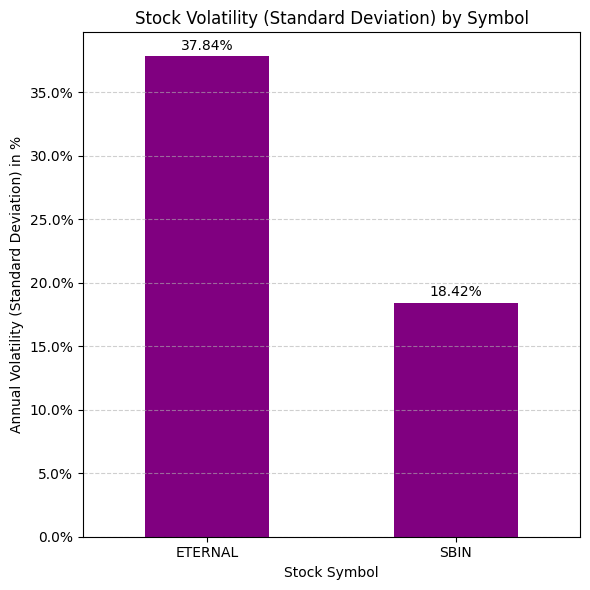

In [88]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # Import the necessary formatter

# Assume 'sd_for_plot' is the Pandas Series:
sd_for_plot = summary_df['Annual_Volatility'] 

# --- Plotting Code (Vertical Bar Chart with Percentages) ---
plt.figure(figsize=(6, 6)) 

# Plot the vertical bar chart
ax = sd_for_plot.plot(kind='bar', color='purple') 

plt.title('Stock Volatility (Standard Deviation) by Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Annual Volatility (Standard Deviation) in %')

# The argument 1.0 tells the formatter that the data is in decimal form (0 to 1).
ax.yaxis.set_major_formatter(PercentFormatter(1.0)) 

# Rotate X-axis labels for readability
plt.xticks(rotation=0, ha='center')

# Use grid lines on the Y-axis for easier reading of the scale
ax.yaxis.grid(linestyle='--', alpha=0.6) 

# Add text labels (annotations) to each bar
for bar in ax.patches:
    # Get the height (value) of the bar
    height = bar.get_height()
    # Get the x position (center of the bar)
    x_pos = bar.get_x() + bar.get_width() / 2
    
    # Multiply height by 100, format to two decimal places, and add the '%' sign
    plt.text(x_pos, height + 0.005, f'{height*100:.2f}%', 
             color='black', 
             ha='center', 
             fontsize=10)

plt.tight_layout()
plt.show()

### Conclusion and Investment Implications (The Prescription)

Diagnosis: The analysis clearly showed that one asset had a significantly higher Annual Volatility (higher risk) than the other during the study period.

Implication (The Prescription): This quantified difference directly informs portfolio strategy:

An investor seeking stability and predictability would favor the asset with lower volatility.

An investor willing to accept higher uncertainty for the potential of greater returns would consider the asset with higher volatility.

Just by changing the name of the stock we can reuse this project as a checkpoint for our investment strategy.

This project has further potential to add more stocks and see the volatility between a number of stocks at the same time.